In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import re
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
df=pd.read_csv("./data/train_1.csv",parse_dates=True).fillna(0)

In [35]:
print(df)

                                                     Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         0.0   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         0.0   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         0.0   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         0.0   
145062  Francisco_el_matemático_(serie_de_televisión_d...         0.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.

In [3]:
df['2015-07-01'].mean()

1024.8821270758222

In [4]:
firstEnglishPage=df[df['lang']=='en'].iloc[:1:]

KeyError: 'lang'

In [5]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

In [6]:
df['lang'] = df.Page.map(get_language)

In [7]:
df['lang']

0         zh
1         zh
2         zh
3         zh
4         zh
          ..
145058    es
145059    es
145060    es
145061    es
145062    es
Name: lang, Length: 145063, dtype: object

In [8]:
countLanguage=df['lang'].value_counts()

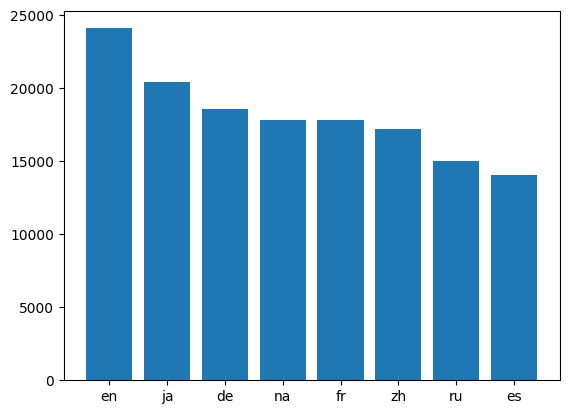

In [9]:
plt.bar(countLanguage.index,countLanguage.values)
plt.show()

In [10]:
grouped=df.groupby(['lang']).median()

/var/folders/71/0q0jw7j15_7__5qvqmbhmjbw0000gn/T/ipykernel_7624/1176267095.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped=df.groupby(['lang']).median()


In [11]:
grouped[:].transpose()

lang,de,en,es,fr,ja,na,ru,zh
2015-07-01,62.0,103.0,267.0,72.0,125.0,3.0,136.0,32.0
2015-07-02,62.0,100.0,262.0,72.0,122.0,3.0,135.0,29.0
2015-07-03,59.0,90.0,237.0,71.5,128.0,3.0,137.0,28.0
2015-07-04,61.0,87.0,199.0,71.0,139.0,3.0,135.0,29.0
2015-07-05,71.0,93.0,237.0,78.0,138.0,3.0,141.0,31.0
...,...,...,...,...,...,...,...,...
2016-12-27,156.0,513.0,226.0,192.0,226.0,7.0,318.5,114.0
2016-12-28,158.0,514.5,233.0,191.0,215.0,7.0,308.0,114.0
2016-12-29,155.0,504.0,226.0,188.0,228.0,8.0,296.0,107.0
2016-12-30,149.0,485.0,199.0,190.0,235.0,9.0,272.0,106.0


In [12]:
GermanSeries=grouped[:].transpose()['de']
EnglishSeries=grouped[:].transpose()['en']
SpanishSeries=grouped[:].transpose()['es']
FrenchSeries=grouped[:].transpose()['fr']
JaSeries=grouped[:].transpose()['ja']
NASeries=grouped[:].transpose()['na']
RussiaSeries=grouped[:].transpose()['ru']
ZhSeries=grouped[:].transpose()['zh']

In [13]:
GermanSeries.size

550

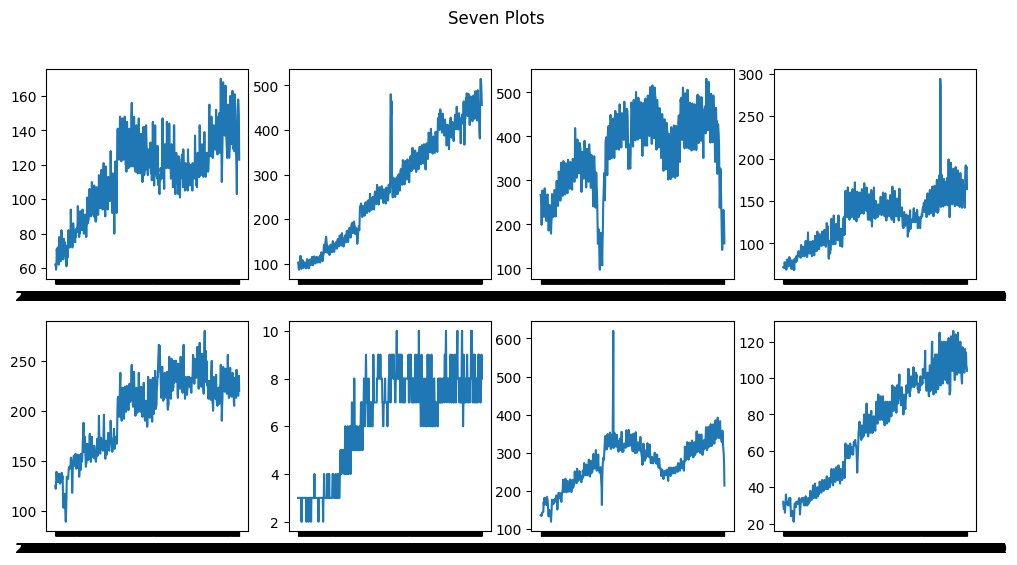

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs[0, 0].plot(GermanSeries)
axs[0, 1].plot(EnglishSeries)
axs[0, 2].plot(SpanishSeries)
axs[0, 3].plot(FrenchSeries)
axs[1, 0].plot(JaSeries)
axs[1, 1].plot(NASeries)
axs[1, 2].plot(RussiaSeries)
axs[1, 3].plot(ZhSeries)

# xticks = np.arange(0, GermanSeries.size)
# axs.set_xticks(xticks)
axs[0, 0].set_xlabel('')
axs[0, 1].set_xlabel('')
axs[0, 2].set_xlabel('')
axs[0, 3].set_xlabel('')
axs[1, 0].set_xlabel('')
axs[1, 1].set_xlabel('')
axs[1, 2].set_xlabel('')
axs[1, 3].set_xlabel('')

# xticklabels = ['']*len(xticks)
# axs.set_xticklabels(xticklabels)

# Add a title for the whole figure
fig.suptitle('Seven Plots')

# Show the plot
plt.show()

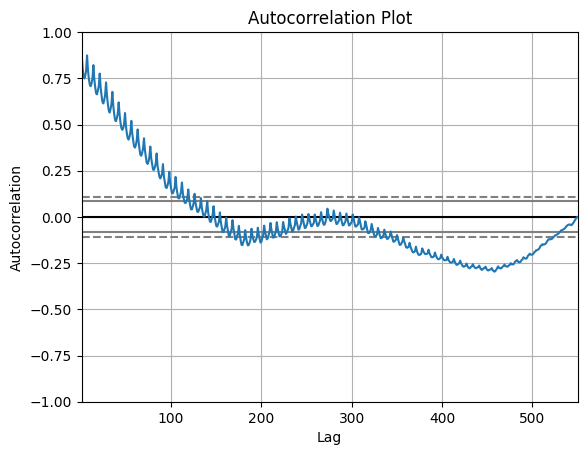

In [15]:

# Create an autocorrelation plot
autocorrelation_plot(GermanSeries)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

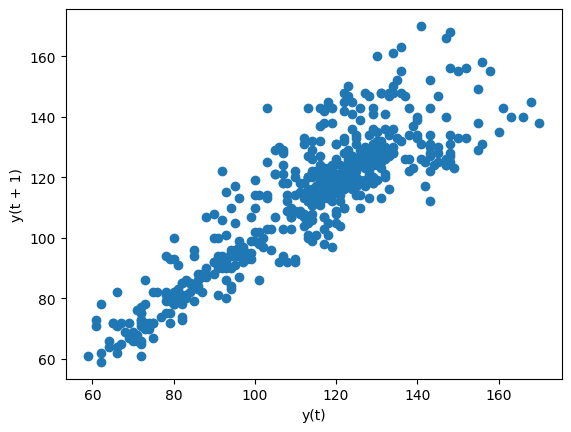

In [16]:
lag_plot(GermanSeries)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

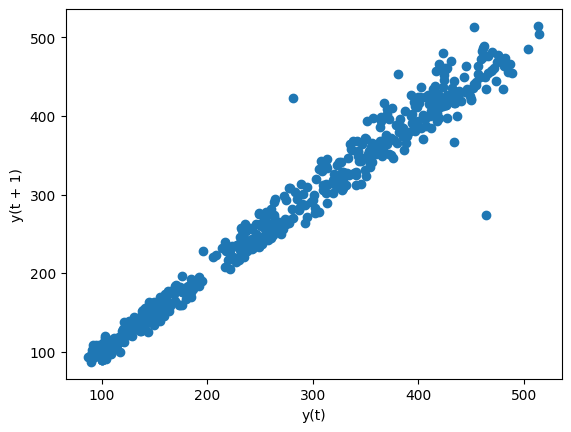

In [17]:
lag_plot(EnglishSeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

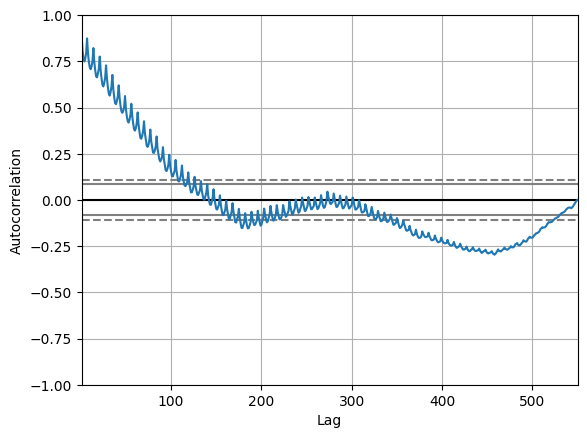

In [18]:
autocorrelation_plot(GermanSeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

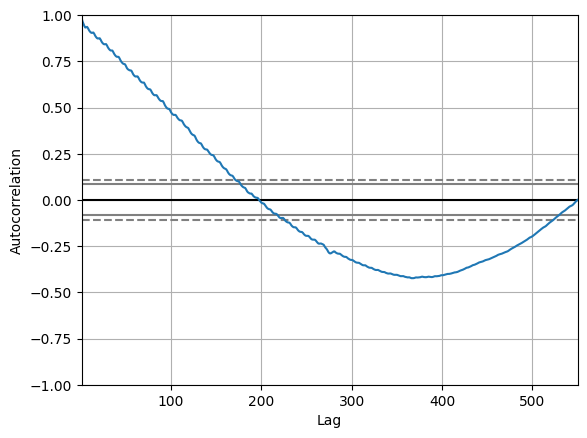

In [19]:
autocorrelation_plot(EnglishSeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

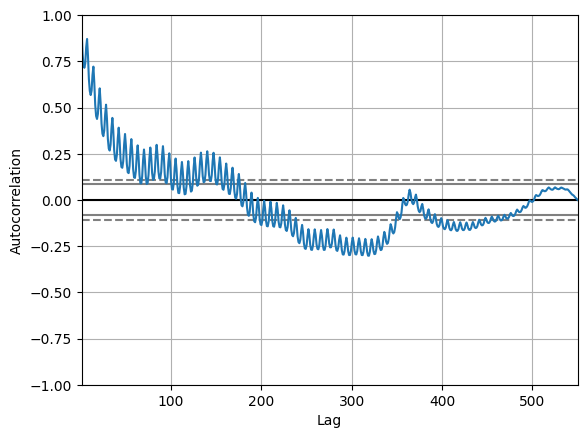

In [20]:
autocorrelation_plot(SpanishSeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

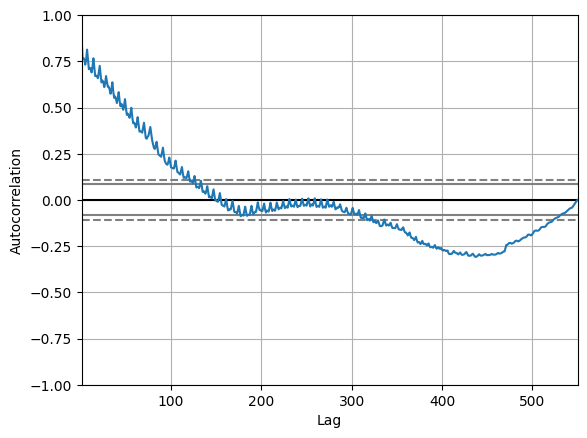

In [21]:
autocorrelation_plot(FrenchSeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

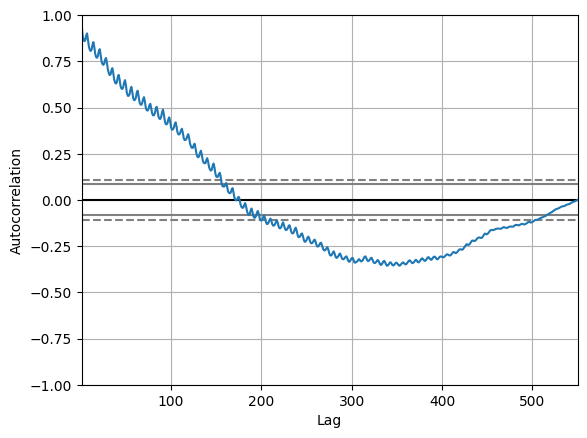

In [22]:
autocorrelation_plot(JaSeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

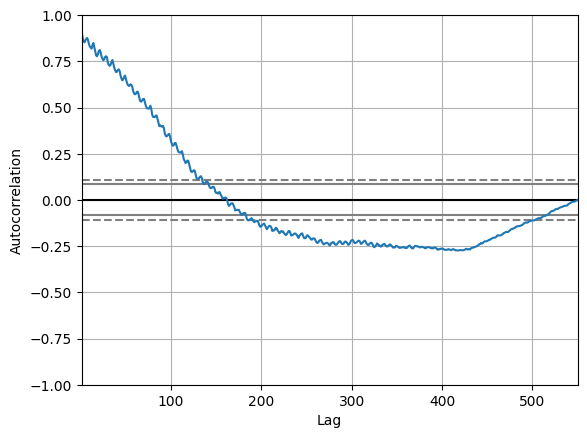

In [23]:
autocorrelation_plot(NASeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

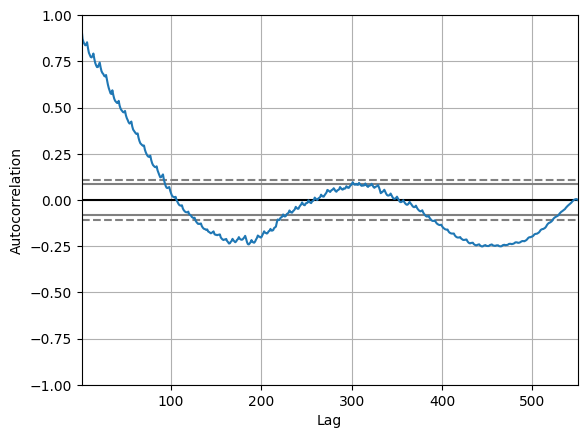

In [24]:
autocorrelation_plot(RussiaSeries)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

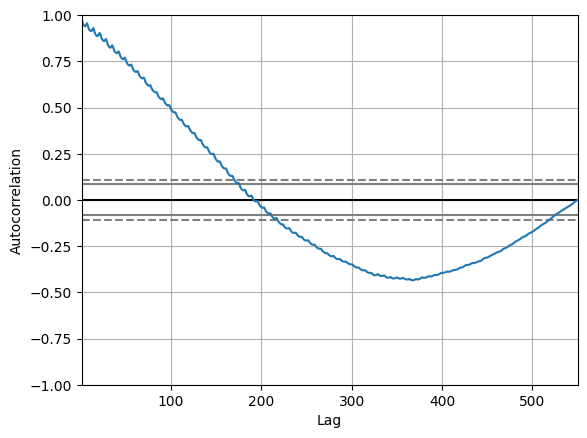

In [25]:
autocorrelation_plot(ZhSeries)

In [26]:
SpanishSeries.values.size

550

In [27]:
testdf=pd.read_csv("./data/train_1.csv",parse_dates=True).fillna(0)

Test RMSE: 24.119


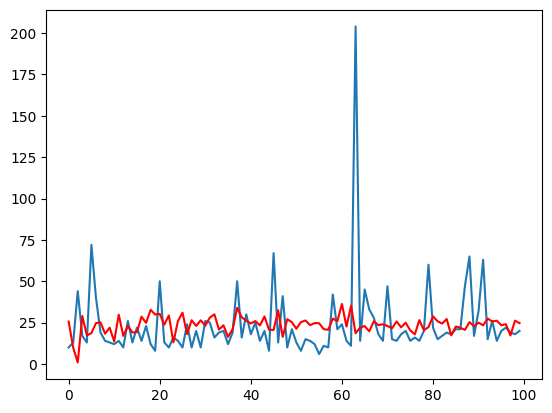

Test RMSE: 65.723


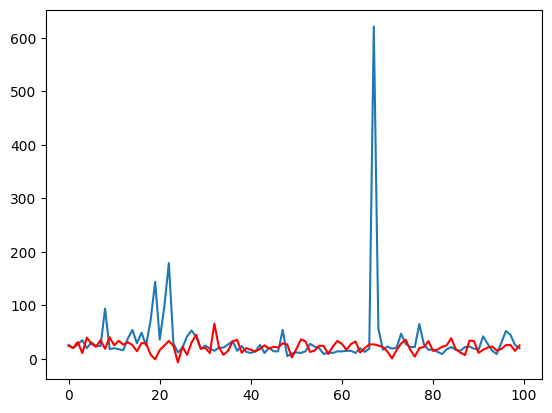

Test RMSE: 20.697


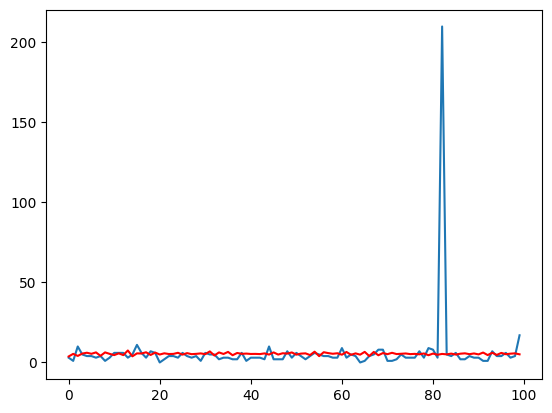

Test RMSE: 14.975


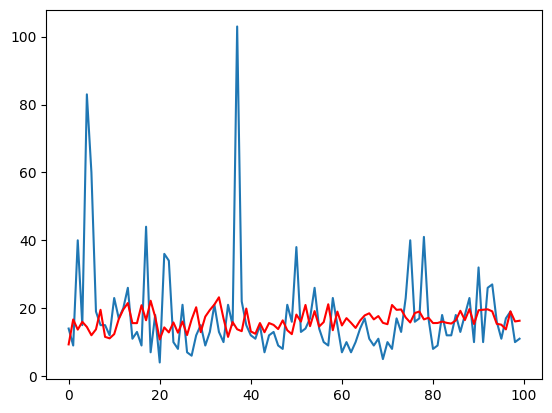

Test RMSE: 27.161


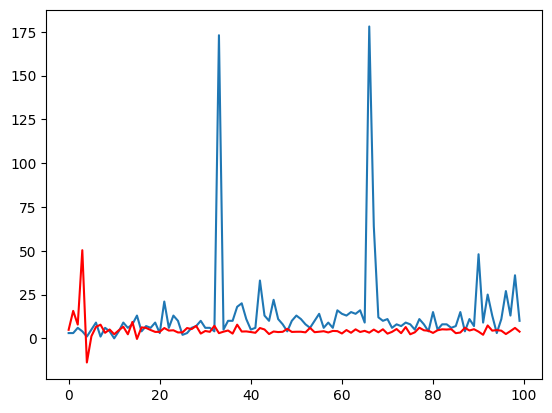

Test RMSE: 25.557


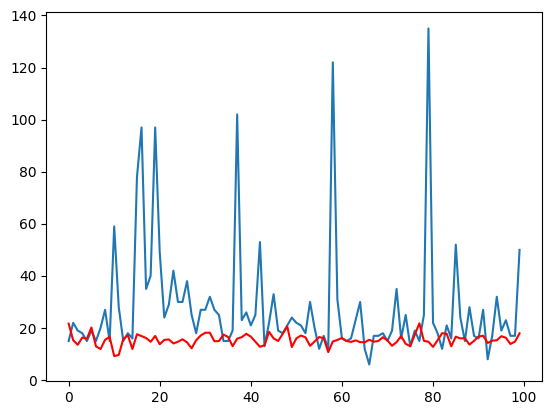

Test RMSE: 244600641.998


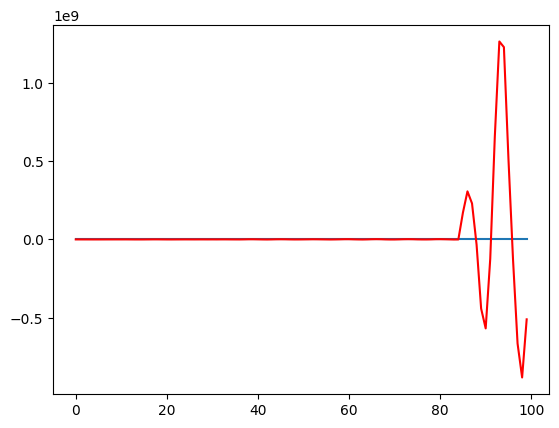

Test RMSE: 62.034


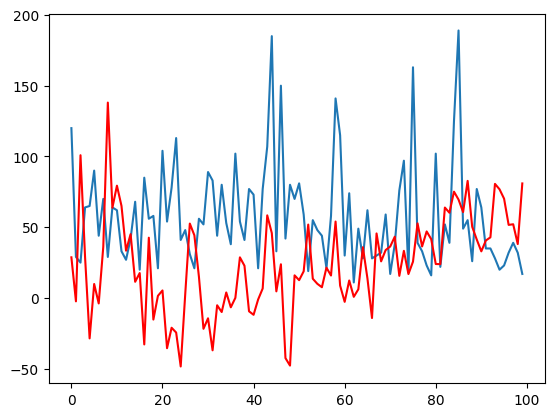

Test RMSE: 22.617


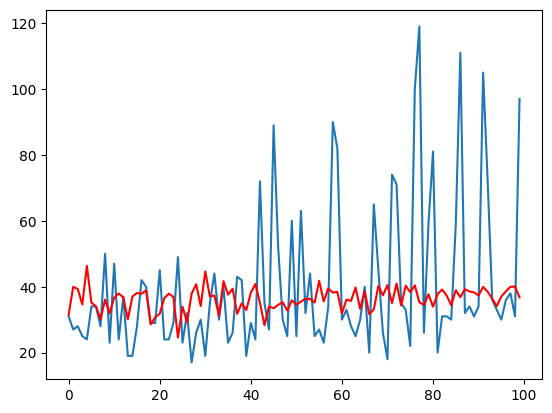

Test RMSE: 8.677


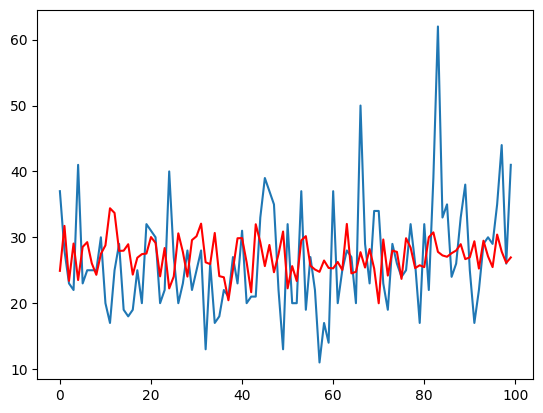

In [28]:
count=0
for i in testdf['Page']:
    k=i
    count+=1
    X=testdf[testdf['Page']==k].transpose().values 
    train, test = X[1:len(X)-100], X[len(X)-100:]
    model = AutoReg(train, lags=100)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    if count==10:
        break


In [29]:
 X= EnglishSeries.values
train, test = X[1:len(X)-100], X[len(X)-100:]
# train autoregression
model = AutoReg(train, lags=100)
model_fit = model.fit()

In [30]:
model_fit.params

array([ 6.58959754e+00,  9.36352615e-01, -1.95016463e-01,  2.88441197e-01,
       -2.16752309e-01, -3.63929588e-01,  2.88687906e-01,  6.12314716e-02,
        1.62492000e-01, -1.37250914e-01, -2.15132476e-01,  7.45278701e-02,
        2.79295067e-02,  2.14721874e-01, -1.03667676e-01, -7.71132675e-02,
       -6.89787816e-02,  5.71896466e-02,  6.75763609e-02,  1.54526708e-02,
       -6.85573264e-02,  2.28457271e-03, -3.83092464e-02,  1.19759288e-01,
       -8.38779735e-02,  8.98585622e-02, -1.31505471e-01,  5.15190622e-02,
        1.06471989e-01, -3.63163625e-02,  6.38192765e-02, -1.58671865e-01,
        8.01798592e-02,  8.21474384e-03,  2.23955561e-02,  1.71996804e-01,
       -2.43468249e-01,  1.80976337e-01, -2.21200144e-01,  1.67559782e-01,
        1.80278549e-03, -2.16517631e-03,  1.07430121e-01, -1.87341543e-01,
        9.87595794e-02, -1.08329704e-01,  1.69473844e-01, -2.62579646e-02,
       -1.40710442e-02,  6.04618678e-03, -9.11941898e-02,  9.24685577e-02,
       -4.78705802e-02,  

In [31]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 35.698


In [32]:
plt.plot(testEnglish)
plt.plot(predictions, color='red')
plt.show()

NameError: name 'testEnglish' is not defined

In [ ]:
testEnglish=firstEnglishPage.transpose().values[len(X)-100:-1]

In [ ]:
testEnglish